## Forecasting - Airlines Data Set

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot
import warnings
import statsmodels.formula.api as smf

In [2]:
air=pd.read_excel("Airlines+Data.xlsx")
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Data Visualization

<AxesSubplot:xlabel='Month'>

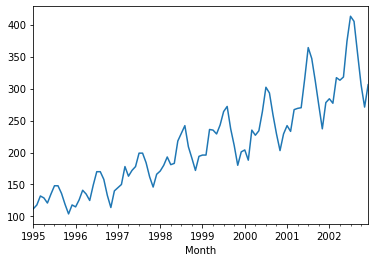

In [6]:
data_vis=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)
data_vis.plot()

(array([13., 14., 19.,  9., 14., 12.,  9.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

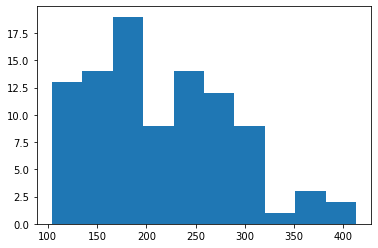

In [7]:
#histogram
plt.hist(data_vis)

<AxesSubplot:ylabel='Density'>

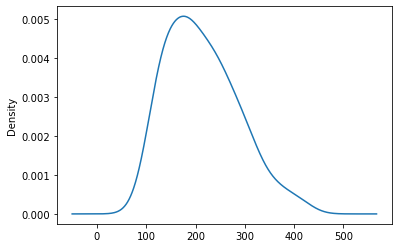

In [8]:
#density plot
data_vis.plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

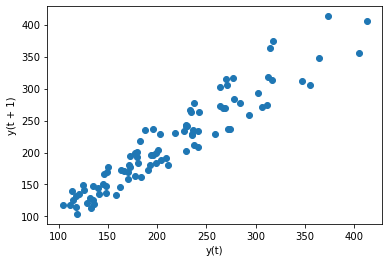

In [9]:
lag_plot(data_vis)

## Model Building

In [10]:
air['Date']=pd.to_datetime(air.Month,format='%y-%b-%d')
air['month']=air.Date.dt.strftime('%b')
air['year']=air.Date.dt.strftime('%Y')
air.head()

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995


In [11]:
air1=air.drop('Date',axis=1)
air1.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [12]:
M_dum=pd.get_dummies(air1.month)
M_dum.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
air2=pd.concat([air1,M_dum],axis=1)
air2.head()

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
air2['t']=range(1,97)
air2.head()

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5


In [15]:
air2['t_squared']=air2.t*air2.t
air2.tail()

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025
95,2002-12-01,306,Dec,2002,0,0,1,0,0,0,0,0,0,0,0,0,96,9216


In [16]:
air2['log_passengers']=np.log(air2.Passengers)
air2.head()

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


<AxesSubplot:xlabel='month', ylabel='year'>

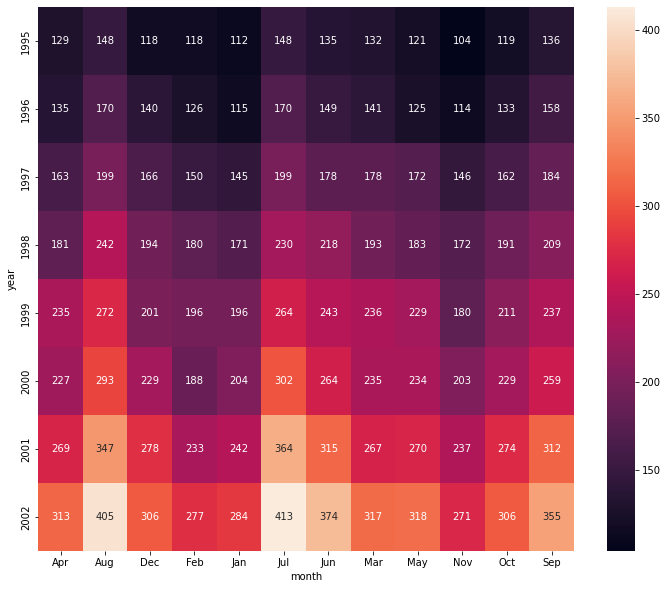

In [17]:
plt.figure(figsize=(12,10))
plot_month_y=pd.pivot_table(data=air2,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(plot_month_y,annot=True,fmt='g')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

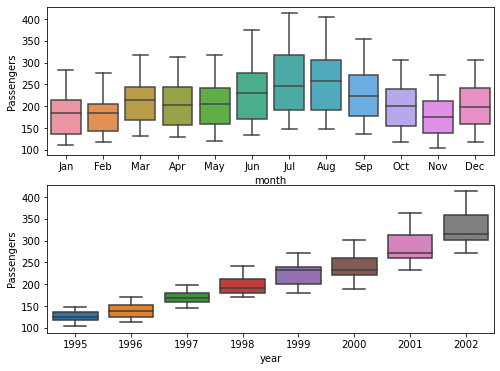

In [18]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=air2)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=air2)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

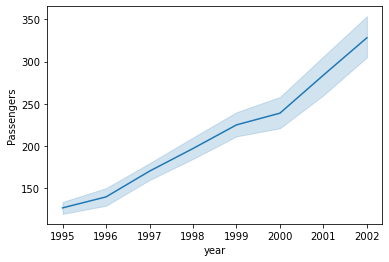

In [19]:
sns.lineplot(x='year',y='Passengers',data=air2)

In [20]:
#splitting the data 
train=air2.head(80)
test=air2.tail(16)

### Linear Model

In [21]:
linear_model = smf.ols('Passengers~t',data=air2).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

44.88584239937148

### Exponential Model

In [22]:
exp_model = smf.ols('log_passengers~t',data=air2).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

43.488878105812354

### Quadratic Model

In [23]:
quad_model = smf.ols('Passengers~t+t_squared',data=air2).fit()
pred_quad = pd.Series(quad_model.predict(test[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

43.5842261610505

### Additive Seasonality Model

In [24]:
add_sea_model = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=air2).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

106.8100771375295

### Additive Seasonality Quadratic Model

In [25]:
add_sea_Quad_model = smf.ols('Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=air2).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test[['t','t_squared','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

17.944501734411936

### Multiplicative Seasonality Model

In [26]:
mul_sea_model = smf.ols('log_passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data = air2).fit()
pred_mult_sea = pd.Series(mul_sea_model.predict(test))
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

116.76281737764967

### Multiplicative Seasonality Quadratic Model

In [27]:
mul_sea_Quad_model = smf.ols('log_passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=air2).fit()
pred_mul_sea_quad = pd.Series(mul_sea_Quad_model.predict(test[['t','t_squared','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_mul_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_mul_sea_quad))**2))
rmse_mul_sea_quad

312.91197381781456

### Multiplicative Additive Model

In [29]:
mul_add_sea = smf.ols('log_passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data = air2).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

7.997346072375979

### Comparing Results

In [30]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","rmse_Mult_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea,rmse_mul_sea_quad])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,7.997346
4,rmse_add_sea_quad,17.944502
1,rmse_Exp,43.488878
2,rmse_Quad,43.584226
0,rmse_linear,44.885842
3,rmse_add_sea,106.810077
5,rmse_Mult_sea,116.762817
7,rmse_Mult_sea_quad,312.911974


### Predicting for new time period

In [31]:
pred_data=air2
pred_data.head()

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [32]:
#build the model on entire dataset
model_full=smf.ols('Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=air2).fit()

## RMSE shows the original error. In this case Multiplicative Additive Seasonality shows the least error. Hence we'll use its rmse value to forecast the model.

In [33]:
pred_new  = pd.Series(mul_add_sea.predict(pred_data))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [34]:
pred_data['forecated_passengers']=pd.Series(pred_new)
pred_data

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers,forecated_passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,4.692963
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,4.703487
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,4.846666
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,4.813814
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,4.807291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.978339
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.868100
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.737989
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119,5.607538
